In [1]:
# Import required libraries
import os
import glob
import numpy as np
from sklearn.decomposition import PCA

In [4]:
# Directory information
test = 'may/'
train  = 'dec/'
TEST = False
VIZ = False
output = 'output/'
dec_train = os.listdir(train)
may_test = os.listdir(test)

In [5]:

if TEST:
    dir_ = test
    iter_ = may_test
else:
    dir_ = train
    iter_ = dec_train
    
for i, file in enumerate(iter_):
    print(i)
    if "Store"  in file:
        continue
    arr = np.load(dir_ + file, allow_pickle=True)
    
    # Obtain the label
    file = file.split('.')[0]
    file = ''.join(filter(lambda x: not x.isdigit(), file)).lower()
    file = file.replace(' ', '_')
    
    # Obtain the file
    #Wideband Red = 0, Wideband Green = 1, Wideband Blue = 2, RedEdge = 3, Blue = 4, NIR = 5, Red = 6, Green = 7
    #NONE = 0, HOMOGENEITY = 1, CONTRAST = 2, ASM = 3, MEAN_I = 4, VAR_I = 5, CORRELATION = 6
    # Top 5 Features -> blue_var, blue_contrast, red_edge_asm, wideband_blue_asm, red_edge_homogeneity, blue_correlation
#     green_correlation', 7.204037130366939),
#  ('wideband_blue_correlation', 6.6797495872643875),
#  ('nir_asm', 6.6797487781234235),
#  ('red_correlation', 6.333467852285289),
#  ('wideband_red_var'
    data = np.zeros((arr.shape[0], arr.shape[1], 10))
    data_cpy = np.zeros((arr.shape[0], arr.shape[1], 10))

    data[:,:,0] = arr[:,:,3,0]
    data[:,:,1] = arr[:,:,4,0]
    data[:,:,2] = arr[:,:,5,0]
    data[:,:,3] = arr[:,:,6,0]
    data[:,:,4] = arr[:,:,7,0]
    data[:,:,5] = arr[:,:,3,4]
    data[:,:,6] = arr[:,:,4,4]
    data[:,:,7] = arr[:,:,5,4]    
    data[:,:,8] = arr[:,:,6,4]
    data[:,:,9] = arr[:,:,7,4]
    width = data.shape[0]
    height = data.shape[1]
    
    
    # Perform PCA on each of the 10 channels
    pca = PCA(5)

    for j in range(9):
        #Applying to red channel and then applying inverse transform to transformed array.
        pca_ = pca.fit_transform(data[:,:,j])
        inverted = pca.inverse_transform(pca_)
        data_cpy[:,:,j] = inverted

    if not TEST:
        try:
            # Create target Directory
            os.mkdir(output + file)

        except FileExistsError:
            pass
    
    # Parameters to divide the image
    div_x = int(width / 2)
    div_y = int(height / 2)
    
    if VIZ:
        np.save(file + '.npy', a)
        continue
    
    # Split based on the four quadrants
    if not TEST:
        np.save(output + file + "/" + file + str(i) + '0.npy', data[:div_x, :div_y, :])
        np.save(output + file + "/" + file + str(i) + '1.npy', data[:div_x, div_y:, :])
        np.save(output + file + "/" + file + str(i) + '2.npy', data[div_x:, :div_y, :])
        np.save(output + file + "/" + file + str(i) + '3.npy', data[div_x:, div_y:, :])
    else:
        np.save(output + file + str(i) + '0.npy', data[:div_x, :div_y, :])
        np.save(output + file + str(i) + '1.npy', data[:div_x, div_y:, :])
        np.save(output + file + str(i) + '2.npy', data[div_x:, :div_y, :])
        np.save(output + file + str(i) + '3.npy', data[div_x:, div_y:, :])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


In [12]:
data.shape

(130, 147, 10)

Text(0.5, 1.0, 'wideband_green_homogeneity')

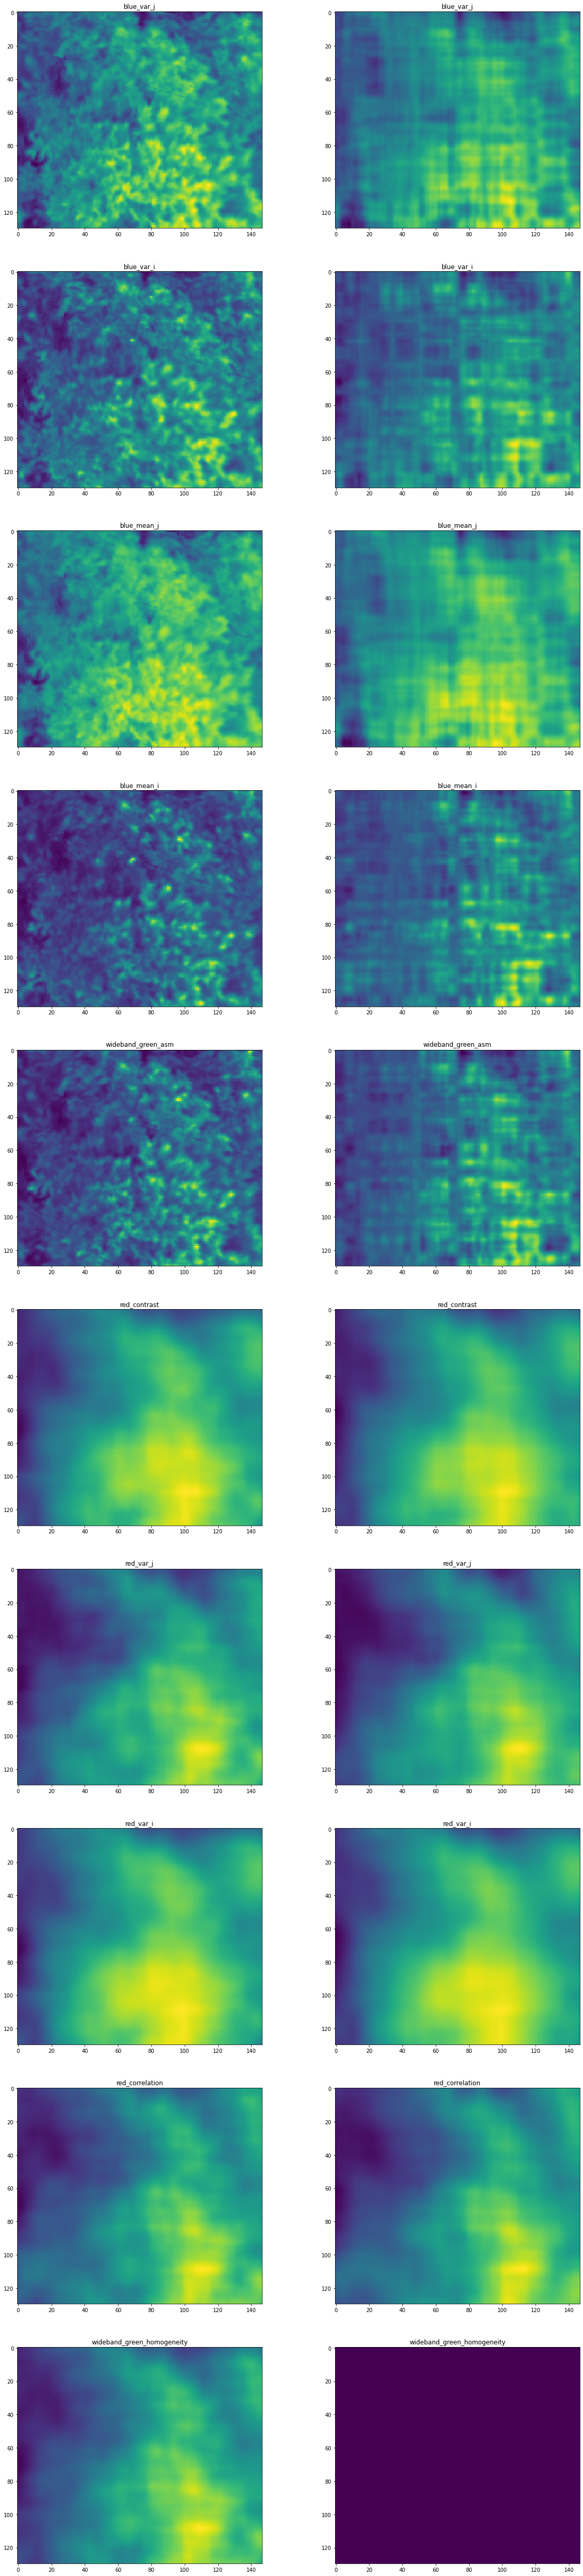

In [13]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(10, 2, figsize=(20, 90))
axs[0, 0].imshow(data[:,:,0])
axs[0, 0].set_title('blue_var_j')
axs[0, 1].imshow(data_cpy[:,:,0])
axs[0, 1].set_title('blue_var_j')
axs[1, 0].imshow(data[:,:,1])
axs[1, 0].set_title('blue_var_i')
axs[1, 1].imshow(data_cpy[:,:,1])
axs[1, 1].set_title('blue_var_i')
axs[2, 0].imshow(data[:,:,2])
axs[2, 0].set_title('blue_mean_j')
axs[2, 1].imshow(data_cpy[:,:,2])
axs[2, 1].set_title('blue_mean_j')
axs[3, 0].imshow(data[:,:,3])
axs[3, 0].set_title('blue_mean_i')
axs[3, 1].imshow(data_cpy[:,:,3])
axs[3, 1].set_title('blue_mean_i')
axs[4, 0].imshow(data[:,:,4])
axs[4, 0].set_title('wideband_green_asm')
axs[4, 1].imshow(data_cpy[:,:,4])
axs[4, 1].set_title('wideband_green_asm')
axs[5, 0].imshow(data[:,:,5])
axs[5, 0].set_title('red_contrast')
axs[5, 1].imshow(data_cpy[:,:,5])
axs[5, 1].set_title('red_contrast')
axs[6, 0].imshow(data[:,:,6])
axs[6, 0].set_title('red_var_j')
axs[6, 1].imshow(data_cpy[:,:,6])
axs[6, 1].set_title('red_var_j')
axs[7, 0].imshow(data[:,:,7])
axs[7, 0].set_title('red_var_i')
axs[7, 1].imshow(data_cpy[:,:,7])
axs[7, 1].set_title('red_var_i')
axs[8, 0].imshow(data[:,:,8])
axs[8, 0].set_title('red_correlation')
axs[8, 1].imshow(data_cpy[:,:,8])
axs[8, 1].set_title('red_correlation')
axs[9, 0].imshow(data[:,:,9])
axs[9, 0].set_title('wideband_green_homogeneity')
axs[9, 1].imshow(data_cpy[:,:,9])
axs[9, 1].set_title('wideband_green_homogeneity')

# for ax in axs.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
    